In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
#from pyAgrum.lib.pretty_print import pretty_cpt,pretty_bn

from IPython.display import display, Math, Latex

# Exercice 6
> From Roland Donat

L'objectif de cet exercice est de comparer l'influence du choix de la structure d'un RB sur la représentativité de données observées.

Pour ce faire, nous nous intéresserons à des données de retour marketing sur la vente de livret A. Dans ces données, les individus sont décrits par les variables suivantes :

    (A)ge : classe d'âges de l'individu - valeurs possibles : [18,25], [26,59], 60+;
    (E)pargne : l'individu a t-il de l'épargne - valeurs possibles : non, oui;
    (V)ente_livret_A : vente d'un livret A à l'individu - valeurs possibles : échec, succès.



## Modèle 1 : $A \rightarrow V \leftarrow E$

Construire un modèle pour le BN.

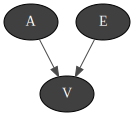

In [2]:
bn1=gum.BayesNet()

A=bn1.add(gum.LabelizedVariable("A","Age",["18-25","26-59","60+"]))
E=bn1.add(gum.LabelizedVariable("E","Epargne",["oui","non"]))
V=bn1.add(gum.LabelizedVariable("V","Vente_livret_A",["echec","succes"]))

bn1.addArc(A,V)
bn1.addArc(E,V)

gnb.showBN(bn1)

Lancer l'apprentissage des paramètres sur le fichier "livretA_10000.csv". Indiquer les distributions a priori que propose cette apprentissage.

In [3]:
learner=gum.BNLearner("livretA_10000.csv")
learn1=learner.learnParameters(bn1.dag())

gnb.sideBySide(*[learn1.cpt(i)for i in learn1.nodes()])

## Modèle 2 : $A \leftarrow V \rightarrow E$

Même question que précédemment

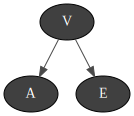

In [4]:
bn2=gum.BayesNet()

A=bn2.add(gum.LabelizedVariable("A","Age",["18-25","26-59","60+"]))
E=bn2.add(gum.LabelizedVariable("E","Epargne",["oui","non"]))
V=bn2.add(gum.LabelizedVariable("V","Vente_livret_A",["echec","succes"]))

bn2.addArc(V,A)
bn2.addArc(V,E)

gnb.showBN(bn2)

In [5]:
learn2=learner.learnParameters(bn2.dag())

gnb.sideBySide(*[learn2.cpt(i)for i in learn2.nodes()])

## Comparaison des 2 modèles

In [6]:
gnb.sideBySide(gnb.getInference(learn1),gnb.getInference(learn2),captions=['premier modèle','second modèle'])

premier modèle,second modèle


In [7]:
gnb.sideBySide(gnb.getInference(learn1,evs={"Age":1}),gnb.getInference(learn2,evs={"Age":1}),captions=['premier modèle','second modèle'])

premier modèle,second modèle


### Quel est le "meilleur" modèle ?

Utiliser la log-vraisemblance pour comparer les 2 modèles
$$ll=\sum_{d \in Base} \log P(d)=\sum_{d \in Base}\ \sum_{v \in BN} \log P(v_d | parents_d(v))$$

In [8]:
from math import fsum, log2 # Quelques fonctions mathématiques
import pandas # Module pour la manipulation des jeux de données

dataframe = pandas.read_csv('livretA_10000.csv')
ll1 = fsum([log2(learn1.cpt(i)[d]) for i in range(learn1.size()) for d in dataframe.to_dict("records")])
ll2 = fsum([log2(learn2.cpt(i)[d]) for i in range(learn2.size()) for d in dataframe.to_dict("records")])
print("LL pour modèle 1 {} (en moyenne par données : {})".format(ll1,ll1/len(dataframe)))
print("LL pour modèle 2 {} (en moyenne par données : {})".format(ll2,ll2/len(dataframe)))

LL pour modèle 1 -33008.72583971006 (en moyenne par données : -3.300872583971006)
LL pour modèle 2 -33609.95129380317 (en moyenne par données : -3.360995129380317)


In [9]:
# en utilisant pyAgrum.lib (tellement plus fin :-) )
import pyAgrum.lib.bn2scores as bnsc
print("Scores for modèle 1")
print(bnsc.computeScores(learn1,"livretA_10000.csv"))
print("Scores for modèle 2")
print(bnsc.computeScores(learn2,"livretA_10000.csv"))

Scores for modèle 1
(100.0, {'mdl': -33323.30126446651, 'bic': -33128.31525112336, 'aicc': -66035.46969382635, 'aic': -33017.72583970741, 'likelihood': -33008.72583970741})
Scores for modèle 2
(100.0, {'mdl': -33860.526718563015, 'bic': -33702.96528046077, 'aicc': -67233.91379433188, 'aic': -33616.95129380392, 'likelihood': -33609.95129380392})


La log vraisemblance du premier modèle étant légèrement plus élevée, on considère que ce dernier est meilleur que le deuxième.